<a href="https://colab.research.google.com/github/vas59/audio_python/blob/master/audio_research_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
from imutils import paths
from keras.preprocessing.image import img_to_array
import random

Using TensorFlow backend.


In [0]:
!rm -rf audio_dataset
# !git clone https://github.com/vas59/audio_dataset.git

In [6]:
!git clone https://github.com/vas59/audio_dataset_video.git

fatal: destination path 'audio_dataset_video' already exists and is not an empty directory.


In [0]:
imagePaths = sorted(list(paths.list_images("audio_dataset/images_out")))


In [0]:
random.seed(42)
random.shuffle(imagePaths)

In [0]:
data = []
for imagePath in imagePaths:
    image = cv2.imread(imagePath, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (64, 64))/255.0
    data.append(image)

data = np.array(data)

In [0]:
del data
del labels

NameError: ignored

In [0]:
del X_train
del X_test
del y_train
del y_test

NameError: ignored

In [7]:
data = []
labels = []
devider = 2
#video loader
videoPaths = sorted(list(paths.list_files("audio_dataset_video/video_out")))
random.seed(42)
random.shuffle(videoPaths)
print(videoPaths)
for videoPath in videoPaths:
    cap = cv2.VideoCapture(videoPath)
    ret = True
    i = 0
    while ret:
        ret, frame = cap.read()
        if ret == False:
            break
        
        if i % devider == 0:
            frame = cv2.cvtColor(frame[:, :frame.shape[1]//2], cv2.COLOR_BGR2GRAY)
            frame = cv2.resize(frame, (64, 64))/255.0
            if frame[60:64, :].mean() > 0.000001:
                data.append(frame)
                label = videoPath.split(os.path.sep)[-2]
                labels.append(label)
        elif videoPath.split(os.path.sep)[-2] == 'We_Will_Rock_You':
            frame = cv2.cvtColor(frame[:, :frame.shape[1]//2], cv2.COLOR_BGR2GRAY)
            frame = cv2.resize(frame, (64, 64))/255.0
            if frame[60:64, :].mean() > 0.000001:
                data.append(frame)
                label = videoPath.split(os.path.sep)[-2]
                labels.append(label)
        i+=1
    print(videoPath, i // devider)
    cap.release()
data = np.array(data)   
labels = np.array(labels)

['audio_dataset_video/video_out/We_Will_Rock_You/We_Will_Rock_You_150_12000_72_out_2.avi', 'audio_dataset_video/video_out/We_Are_The_Champions/We_Are_The_Champions_150_12000_72_out_1.avi', 'audio_dataset_video/video_out/The_Show_Must_Go_On/The_Show_Must_Go_On_150_16000_72_out_3.avi', 'audio_dataset_video/video_out/We_Will_Rock_You/We_Will_Rock_You_150_16000_72_out_3.avi', 'audio_dataset_video/video_out/We_Are_The_Champions/We_Are_The_Champions_16000_72_out_3.avi', 'audio_dataset_video/video_out/We_Will_Rock_You/We_Will_Rock_You_150_12000_72_out_1.avi', 'audio_dataset_video/video_out/none/none_out_1.avi', 'audio_dataset_video/video_out/We_Are_The_Champions/We_Are_The_Champions_150_12000_72_out_2.avi', 'audio_dataset_video/video_out/The_Show_Must_Go_On/The_Show_Must_Go_On_150_12000_72_out_1.avi', 'audio_dataset_video/video_out/The_Show_Must_Go_On/The_Show_Must_Go_On_150_12000_72_out_2.avi', 'audio_dataset_video/video_out/none/none_out_2.avi']
audio_dataset_video/video_out/We_Will_Rock_Yo

In [10]:
del cap

NameError: ignored

In [9]:
print(data.shape, labels.shape)

(93043, 64, 64) (93043,)


In [0]:
f
# for i in data:
q = np.array([w.mean() for w in data]  )

In [0]:
(labels == "The_Show_Must_Go_On").sum()

31404

In [0]:
import os
labels = []
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
labels = np.array(labels)

In [0]:
labels2 = labels[q > 0.002]
data2 = data[q > 0.002]
data2.shape

(50707, 64, 64)

In [0]:
data = data2
labels = labels2

In [0]:
np.random.seed(42)
np.random.shuffle(data)
np.random.seed(42)
np.random.shuffle(labels)

In [0]:
q.shape

(50818,)

In [0]:
from keras.layers import Conv2D, Conv2DTranspose, Flatten, Input, Dense, Reshape
from keras.layers.advanced_activations import LeakyReLU, PReLU

from keras import Model

In [0]:
# encoder
input_ = Input((64, 64, 1)) # 64
x = Conv2D(filters=8, kernel_size=2, strides=2, activation='relu')(input_) # 32
x = Conv2D(filters=16, kernel_size=2, strides=2, activation='relu')(x) # 16
x = Conv2D(filters=32, kernel_size=2, strides=2, activation='relu')(x) # 8
x = Conv2D(filters=64, kernel_size=2, strides=2, activation='relu')(x) # 4
x = Conv2D(filters=128, kernel_size=2, strides=2, activation='relu')(x) # 2
flat = Flatten()(x)
latent = Dense(128)(flat)

# decoder
reshape = Reshape((2,2,32)) #2
conv_2t_1 = Conv2DTranspose(filters=128, kernel_size=2, strides=2, activation='relu') # 4
conv_2t_2 = Conv2DTranspose(filters=64, kernel_size=2, strides=2, activation='relu') # 8
conv_2t_3 = Conv2DTranspose(filters=32, kernel_size=2, strides=2, activation='relu') # 16
conv_2t_4 = Conv2DTranspose(filters=16, kernel_size=2, strides=2, activation='relu') # 32
conv_2t_5 = Conv2DTranspose(filters=1, kernel_size=2, strides=2, activation='sigmoid') # 64

x = reshape(latent)
x = conv_2t_1(x)
x = conv_2t_2(x)
x = conv_2t_3(x)
x = conv_2t_4(x)
decoded = conv_2t_5(x) # 64

autoencoder = Model(input_, decoded)
encoder = Model(input_, latent)

decoder_input = Input((128,))
x_ = reshape(decoder_input)
x_ = conv_2t_1(x_)
x_ = conv_2t_2(x_)
x_ = conv_2t_3(x_)
x_ = conv_2t_4(x_)
decoded_ = conv_2t_5(x_) # 64
decoder = Model(decoder_input, decoded_)


In [0]:
#auto decoder
input_ = Input((64, 64, 1)) 

x = Conv2D(filters=4, kernel_size=2, strides=2, activation='relu',padding='same')(input_) 
x = Conv2D(filters=6, kernel_size=2, strides=2, activation='relu',padding='same')(x)
x = Conv2D(filters=8,kernel_size=2, strides=2, activation='relu',padding='same')(x) 
flat = Flatten()(x)
latent = Dense(128,activation='relu')(flat)


reshape = Reshape((-1,8,8)) 
dense = Dense(512,activation='relu')
conv_2t_1 = Conv2DTranspose(filters=8, kernel_size=2, strides=2, activation='relu',padding='same') 
conv_2t_2 = Conv2DTranspose(filters=6, kernel_size=2, strides=2, activation='relu',padding='same') 
conv_2t_3 = Conv2DTranspose(filters=1, kernel_size=2, strides=2, activation='relu',padding='same') 
 

x = dense(latent)
x = reshape(x)
x = conv_2t_1(x)
x = conv_2t_2(x)
decoded = conv_2t_3(x) 

autoencoder = Model(input_, decoded)
encoder = Model(input_, latent)

decoder_input = Input((128,))
x_ = dense(decoder_input)
x_ = reshape(x_)
x_ = conv_2t_1(x_)
x_ = conv_2t_2(x_)
decoded_ = conv_2t_3(x_) 
decoder = Model(decoder_input, decoded_)

In [0]:
del x

In [0]:
#auto decoder
input_ = Input((150, 75, 1)) 

x = Conv2D(filters=4, kernel_size=2, strides=2, activation='relu',padding='same')(input_) 
x = Conv2D(filters=6, kernel_size=2, strides=2, activation='relu',padding='same')(x)
x = Conv2D(filters=8,kernel_size=2, strides=2, activation='relu',padding='same')(x) 
flat = Flatten()(x)
latent = Dense(128,activation='relu')(flat)


reshape = Reshape((-1,8,8)) 
dense = Dense(512,activation='relu')
conv_2t_1 = Conv2DTranspose(filters=8, kernel_size=2, strides=2, output_padding=(19, 10), activation='relu',padding='same') 
conv_2t_2 = Conv2DTranspose(filters=6, kernel_size=2, strides=2, activation='relu',padding='same') 
conv_2t_3 = Conv2DTranspose(filters=1, kernel_size=2, strides=2, activation='relu',padding='same') 
 

x = dense(latent)
x = reshape(x)
x = conv_2t_1(x)
x = conv_2t_2(x)
decoded = conv_2t_3(x) 

autoencoder = Model(input_, decoded)
encoder = Model(input_, latent)

decoder_input = Input((128,))
x_ = dense(decoder_input)
x_ = reshape(x_)
x_ = conv_2t_1(x_)
x_ = conv_2t_2(x_)
decoded_ = conv_2t_3(x_) 
decoder = Model(decoder_input, decoded_)

ValueError: ignored

In [27]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 8)         40        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 16)        528       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 32)          2080      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          8256      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 2, 2, 128)         32896     
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
__________

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [0]:
data = np.expand_dims(data, -1)

In [21]:
labels

array(['We_Will_Rock_You', 'We_Are_The_Champions', 'none', ...,
       'The_Show_Must_Go_On', 'We_Will_Rock_You', 'We_Are_The_Champions'],
      dtype='<U20')

In [22]:
data.shape

(93043, 64, 64, 1)

In [24]:
labels[80000]

'The_Show_Must_Go_On'

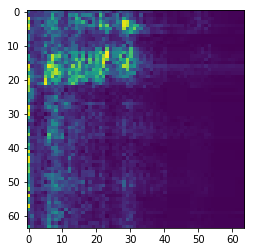

In [23]:
plt.imshow(np.squeeze(data[80000]))


In [29]:
autoencoder.fit(x = data, y = data, epochs=15) #10+27

Epoch 1/15
93043/93043 [==============================] - 28s 297us/step - loss: 0.2690
Epoch 2/15
93043/93043 [==============================] - 26s 283us/step - loss: 0.2565
Epoch 3/15
93043/93043 [==============================] - 26s 283us/step - loss: 0.2548
Epoch 4/15
93043/93043 [==============================] - 26s 285us/step - loss: 0.2540
Epoch 5/15
93043/93043 [==============================] - 26s 280us/step - loss: 0.2535
Epoch 6/15
93043/93043 [==============================] - 26s 279us/step - loss: 0.2531
Epoch 7/15
93043/93043 [==============================] - 26s 283us/step - loss: 0.2529
Epoch 8/15
93043/93043 [==============================] - 26s 280us/step - loss: 0.2527
Epoch 9/15
93043/93043 [==============================] - 26s 281us/step - loss: 0.2526
Epoch 10/15
93043/93043 [==============================] - 26s 280us/step - loss: 0.2525
Epoch 11/15
93043/93043 [==============================] - 26s 282us/step - loss: 0.2525
Epoch 12/15
93043/93043 [=====

In [0]:
# pred_x = encoder.predict(data)

In [0]:
encoder.save("encoder_model_12000_16000_128f_15_out2.h5")
# encoder.save_weights("encoder.h5")

In [0]:
decoder.save("decoder_img_model_12000_16000_128f_15_out2.h5")

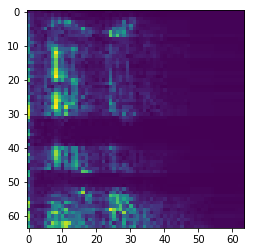

In [45]:
ti = 10000
pred = encoder.predict(np.expand_dims(data[ti],axis=0))
plt.imshow(np.squeeze(data[ti]))

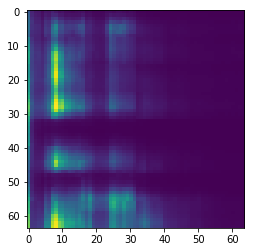

In [46]:
plt.imshow(np.squeeze(decoder.predict(pred)[0]))

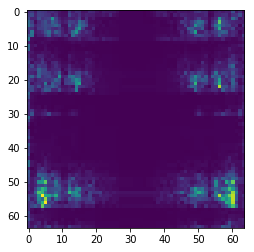

In [0]:
plt.imshow(np.squeeze(X_train[8000]))

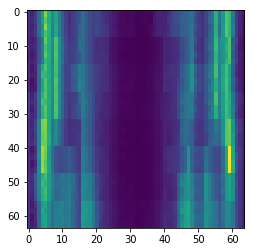

In [0]:
plt.imshow(np.squeeze(decoder.predict(pred)[0]))

In [0]:
pred_x[6000]

array([0.9000809 , 0.5899577 , 0.9239757 , 0.        , 0.9613411 ,
       1.1918973 , 0.13646331, 0.87489974, 0.8561525 , 0.52350074,
       0.07635103, 0.9902548 , 0.27210426, 0.77985704, 0.73188764,
       0.        , 0.23114622, 0.48274264, 0.61760175, 0.69122386,
       0.47524688, 0.67193747, 1.0241005 , 0.80520034, 0.        ,
       0.6595739 , 1.4699875 , 1.2345351 , 0.26645258, 0.37882942,
       0.8206509 , 0.9478471 , 0.2192364 , 0.        , 0.707946  ,
       1.33761   , 1.3951272 , 0.48411644, 1.3002911 , 0.9299097 ,
       1.4451736 , 1.0785714 , 0.82623523, 0.7405474 , 1.0465233 ,
       0.        , 0.03120595, 0.36437574, 0.        , 0.81822944,
       0.6782667 , 0.29132846, 0.14306056, 0.14450777, 0.39805794,
       1.0083182 , 1.5202479 , 0.49873775, 0.9857839 , 0.45726183,
       0.        , 0.        , 0.9079135 , 1.6884384 , 0.62509525,
       0.3775706 , 0.10655623, 0.7528955 , 0.45158556, 0.        ,
       0.6692924 , 0.3556566 , 0.77688813, 0.29162323, 0.97891

In [4]:
!pip install catboost

In [0]:
from keras.backend.tensorflow_backend import set_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import get_session
import tensorflow

# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

#     try:
#         del classifier # this is from global space - change this as you need
#     except:
#         pass

#     print(gc.collect()) # if it's done something you should see a number being outputted

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))

In [0]:
reset_keras()

NameError: ignored

In [0]:
import catboost

In [0]:
clf = catboost.CatBoostClassifier(task_type='GPU', max_depth=7, iterations=1500)

In [7]:
from keras.models import load_model
# mm = load_model("/content/encoder_model_12000_out2.h5")

mm = load_model("/content/encoder_model_12000_16000_128f_15_out2.h5")

W0726 19:46:35.841370 140031981934464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 19:46:35.887633 140031981934464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 19:46:36.011033 140031981934464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0726 19:46:36.012038 140031981934464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0726 19:46:36.012979 140031981934464 depre

In [51]:
data.shape

(93043, 64, 64, 1)

In [52]:
# np.expand_dims(data[8000],axis=0).shape

(1, 64, 64, 1)

In [0]:
pred = mm.predict(np.expand_dims(data[8000],axis=0))

ValueError: ignored

In [0]:
pred[0]

array([2.5002549 , 1.950091  , 2.9730284 , 0.7470601 , 1.1764717 ,
       1.2736937 , 3.0794494 , 1.3778433 , 0.        , 4.483772  ,
       3.9622464 , 2.078836  , 1.4944779 , 2.302758  , 1.2859801 ,
       3.596683  , 0.        , 1.8203955 , 2.3455124 , 6.605709  ,
       2.864308  , 0.85323733, 0.        , 0.        , 3.6118333 ,
       1.4450613 , 2.006596  , 0.        , 0.7571342 , 4.758204  ,
       1.2145714 , 0.        , 0.        , 2.435197  , 3.0891068 ,
       0.        , 0.8709247 , 3.4397147 , 3.135913  , 0.        ,
       0.        , 2.2670567 , 0.        , 1.4200362 , 5.8300905 ,
       3.5091686 , 2.8219843 , 3.7247407 , 1.9295768 , 0.8910525 ,
       3.9212031 , 0.        , 5.2256165 , 2.9202309 , 3.3708003 ,
       2.2345684 , 5.450888  , 4.9435263 , 2.0804465 , 7.577198  ,
       4.644932  , 0.        , 0.85668135, 0.30872488, 7.92405   ,
       1.7441355 , 4.0502205 , 1.0786889 , 0.6447463 , 3.1527357 ,
       0.08960283, 2.970296  , 2.1938026 , 2.271017  , 0.     

In [8]:
data_ts = []
labels_ts = []
devider = 2
fr_size = 50
#video loader
videoPaths = sorted(list(paths.list_files("audio_dataset_video/video_out")))
random.seed(42)
random.shuffle(videoPaths)
print(videoPaths)
for videoPath in videoPaths:
    cap = cv2.VideoCapture(videoPath)
    ret = True
    i = 0
    j = 0
    window = np.zeros((fr_size, 128))
    while ret:
        ret, frame = cap.read()
        if ret == False:
            break
        
        
        if frame[60:64, :].mean() > 0.000001:
            if j % devider == 0:
                frame = cv2.cvtColor(frame[:, :frame.shape[1]//2], cv2.COLOR_BGR2GRAY)
                frame = cv2.resize(frame, (64, 64))/255.0
                frame = np.expand_dims(frame, -1)

                window = np.roll(window, 1, axis=0)
                pred_x = mm.predict(np.expand_dims(frame,axis=0))
                window[0] = pred_x[0]
                i+=1
                if i >= fr_size:
                    data_ts.append(np.concatenate(window))
#                     data_ts.append(window)
                    label = videoPath.split(os.path.sep)[-2]
                    labels_ts.append(label)
            j+=1
#             mp.con
#             window.c
#             if frame[60:64, :].mean() > 0.000001:
#             data.append(frame)
            
#         if i % fr_size == 0:
#             frame = cv2.cvtColor(frame[:, :frame.shape[1]//2], cv2.COLOR_BGR2GRAY)
#             frame = cv2.resize(frame, (64, 64))/255.0
# #             if frame[60:64, :].mean() > 0.000001:
#             data.append(frame)
#             label = videoPath.split(os.path.sep)[-2]
#             labels.append(label)

            
    
    print(videoPath, i-fr_size)
    cap.release()
data_ts = np.array(data_ts)   
labels_ts = np.array(labels_ts)

['audio_dataset_video/video_out/We_Will_Rock_You/We_Will_Rock_You_150_12000_72_out_2.avi', 'audio_dataset_video/video_out/We_Are_The_Champions/We_Are_The_Champions_150_12000_72_out_1.avi', 'audio_dataset_video/video_out/The_Show_Must_Go_On/The_Show_Must_Go_On_150_16000_72_out_3.avi', 'audio_dataset_video/video_out/We_Will_Rock_You/We_Will_Rock_You_150_16000_72_out_3.avi', 'audio_dataset_video/video_out/We_Are_The_Champions/We_Are_The_Champions_16000_72_out_3.avi', 'audio_dataset_video/video_out/We_Will_Rock_You/We_Will_Rock_You_150_12000_72_out_1.avi', 'audio_dataset_video/video_out/none/none_out_1.avi', 'audio_dataset_video/video_out/We_Are_The_Champions/We_Are_The_Champions_150_12000_72_out_2.avi', 'audio_dataset_video/video_out/The_Show_Must_Go_On/The_Show_Must_Go_On_150_12000_72_out_1.avi', 'audio_dataset_video/video_out/The_Show_Must_Go_On/The_Show_Must_Go_On_150_12000_72_out_2.avi', 'audio_dataset_video/video_out/none/none_out_2.avi']
audio_dataset_video/video_out/We_Will_Rock_Yo

In [0]:
del data_ts
del labels_ts

In [0]:
np.random.seed(42)
np.random.shuffle(data_ts)
np.random.seed(42)
np.random.shuffle(labels_ts)

In [11]:
# plt.imshow(np.squeeze(data_ts[50]))
labels_ts[50]

'We_Will_Rock_You'

In [15]:
data_ts.shape

(77638, 50, 128)

In [0]:
# data = np.expand_dims(data, -1)
plt.imshow(np.squeeze(X_train[0]))
print(X_train[0].shape)
# test_iiimg = np.array(X_train[0][:, :64])
# print(test_iiimg.shape)
# a = np.array([1,2,3,4,5])
# a = )
# print(np.expand_dims(X_train[0][0][0], 2))
test_img = np.array([i[0] for i in X_train[0][0]])
# print(test_img)


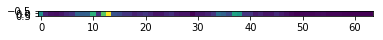

In [0]:
plt.imshow(np.expand_dims(test_img, axis=0))

In [0]:
aas = [19, 40, 13, 124, 77, 46, 45, 3, 15, 60, 61, 76, 91, 99, 113]
aas = [124, 77, 46, 45, 3, 15, 60, 61, 76, 91, 99, 113]
aas = [46, 45, 3, 15, 60, 61, 76, 91, 99, 113]
aas = []
df_train = pd.DataFrame(X_train_p).drop(aas, axis=1)
# df_test = pd.DataFrame(X_test_p).drop(aas, axis=1)

# df_train2 = pd.DataFrame([np.array([i[0] for i in X_train[g][0]]) for g in range(X_train.shape[0])])
# df_test2 = pd.DataFrame([np.array([i[0] for i in X_test[g][0]]) for g in range(X_test.shape[0])])
# df_train2.columns = ["raw_" + str(i) for i in range(64)]
# df_test2.columns = ["raw_" + str(i) for i in range(64)]

# df_train = pd.concat([df_train, df_train2], axis=1)
# df_test = pd.concat([df_test, df_test2], axis=1)

In [0]:
data_ts = data_ts.transpose(2,0,1).reshape(2,-1)

In [0]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(data,
	labels, test_size=0.1, random_state=42)

In [0]:
X_train_p = mm.predict(X_train)
X_test_p = mm.predict(X_test)

In [12]:
clf.fit(data_ts, labels_ts)

0:	learn: 1.3422937	total: 505ms	remaining: 12m 36s
1:	learn: 1.3012810	total: 827ms	remaining: 10m 19s
2:	learn: 1.2626982	total: 1.16s	remaining: 9m 40s
3:	learn: 1.2266156	total: 1.5s	remaining: 9m 21s
4:	learn: 1.1929108	total: 1.84s	remaining: 9m 9s
5:	learn: 1.1609801	total: 2.16s	remaining: 8m 56s
6:	learn: 1.1311202	total: 2.49s	remaining: 8m 52s
7:	learn: 1.1027829	total: 2.83s	remaining: 8m 48s
8:	learn: 1.0755082	total: 3.17s	remaining: 8m 45s
9:	learn: 1.0499386	total: 3.51s	remaining: 8m 42s
10:	learn: 1.0250613	total: 3.83s	remaining: 8m 38s
11:	learn: 1.0024459	total: 4.17s	remaining: 8m 36s
12:	learn: 0.9802531	total: 4.51s	remaining: 8m 35s
13:	learn: 0.9593330	total: 4.84s	remaining: 8m 33s
14:	learn: 0.9393739	total: 5.17s	remaining: 8m 31s
15:	learn: 0.9202075	total: 5.5s	remaining: 8m 30s
16:	learn: 0.9016554	total: 5.83s	remaining: 8m 28s
17:	learn: 0.8839046	total: 6.16s	remaining: 8m 27s
18:	learn: 0.8671800	total: 6.46s	remaining: 8m 23s
19:	learn: 0.8500440	to

In [57]:
clf.fit(X_train_p, y_train)

0:	learn: 1.3478210	total: 33.6ms	remaining: 50.4s
1:	learn: 1.3116442	total: 63.3ms	remaining: 47.4s
2:	learn: 1.2781343	total: 92.6ms	remaining: 46.2s
3:	learn: 1.2469192	total: 122ms	remaining: 45.7s
4:	learn: 1.2175552	total: 152ms	remaining: 45.5s
5:	learn: 1.1888962	total: 183ms	remaining: 45.5s
6:	learn: 1.1631464	total: 213ms	remaining: 45.4s
7:	learn: 1.1389777	total: 243ms	remaining: 45.4s
8:	learn: 1.1139677	total: 269ms	remaining: 44.5s
9:	learn: 1.0914698	total: 291ms	remaining: 43.4s
10:	learn: 1.0700405	total: 314ms	remaining: 42.4s
11:	learn: 1.0484020	total: 336ms	remaining: 41.7s
12:	learn: 1.0282487	total: 360ms	remaining: 41.1s
13:	learn: 1.0094246	total: 382ms	remaining: 40.6s
14:	learn: 0.9914598	total: 405ms	remaining: 40.1s
15:	learn: 0.9737458	total: 427ms	remaining: 39.6s
16:	learn: 0.9565278	total: 450ms	remaining: 39.2s
17:	learn: 0.9404266	total: 468ms	remaining: 38.6s
18:	learn: 0.9240091	total: 487ms	remaining: 37.9s
19:	learn: 0.9087081	total: 505ms	rema

In [0]:
clf.save_model("catboost_decoder_12000_16000_6400f_15_out2.catboost")

In [0]:
# clf.predict_proba(df_train[:, 50])# The_Show_Must_Go_On We_Are_The_Champions We_Will_Rock_You none

In [59]:
# qwe
# qwe.load_model("catboost_decoder_12000_1.catboost")
from sklearn.metrics import accuracy_score

# da_train = np.concatenate([X_train_p, [np.array([i[0] for i in X_train[g][0]]) for g in range(X_train.shape[0])]], axis=1)

print(accuracy_score(y_train, clf.predict(X_train_p)))
print(accuracy_score(y_test, clf.predict(X_test_p)))

1.0
1.0


In [0]:
#reg time s
input_ = Input((50, 128, 1)) 

# x = Conv2D(filters=4, kernel_size=2, strides=2, activation='relu',padding='same')(input_) 
# x = Conv2D(filters=6, kernel_size=2, strides=2, activation='relu',padding='same')(x)
# x = Conv2D(filters=8,kernel_size=2, strides=2, activation='relu',padding='same')(x) 

# x = Dense(8*8*16)(input_)
# x = Reshape((64, 64, -1))(x)
# x = Conv2D(filters=4, kernel_size=2, strides=2, activation='relu',padding='same')(input_) 
# x = Dense(64*10)(x)
# x = Conv2D(filters=6, kernel_size=2, strides=2, activation='relu',padding='same')(x) 
# x = Conv2D(filters=8, kernel_size=2, strides=2, activation='relu',padding='same')(x) 

x = Conv2D(filters=8, kernel_size=2, strides=2, activation='relu')(input_) # 32
x = Conv2D(filters=16, kernel_size=2, strides=2, activation='relu')(x) # 16
x = Conv2D(filters=32, kernel_size=2, strides=2, activation='relu')(x) # 8
x = Conv2D(filters=64, kernel_size=2, strides=2, activation='relu')(x) # 4
x = Conv2D(filters=128, kernel_size=2, strides=2, activation='relu')(x) # 2

x = Flatten()(x)
# x = Dense(64*10)(x)
x = Dense(128)(x)
x = Dense(128)(x)
x = Dense(4)(x)

clreg = x

reg_nn = Model(input_, clreg)

In [32]:
reg_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50, 128, 1)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 64, 8)         40        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 32, 16)        528       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 16, 32)         2080      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 8, 64)          8256      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 4, 128)         32896     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
__________

In [0]:
from keras.utils import to_categorical

In [0]:
labels_str = {"We_Are_The_Champions":1, "The_Show_Must_Go_On":2, "We_Will_Rock_You":3, "none":0}

In [21]:
labels_ts

array(['The_Show_Must_Go_On', 'We_Will_Rock_You', 'We_Are_The_Champions',
       ..., 'The_Show_Must_Go_On', 'We_Will_Rock_You',
       'The_Show_Must_Go_On'], dtype='<U20')

In [0]:
labels_ts_ohe = to_categorical([labels_str[i] for i in labels_ts],  num_classes=4)

In [37]:
# qwe
# qwe.load_model("catboost_decoder_12000_1.catboost")
from sklearn.metrics import accuracy_score

# da_train = np.concatenate([X_train_p, [np.array([i[0] for i in X_train[g][0]]) for g in range(X_train.shape[0])]], axis=1)

print(accuracy_score([labels_str[i] for i in labels_ts], reg_nn.predict(data_ts).argmax(axis=-1)))

1.0


In [0]:

reg_nn.compile(optimizer='adam', loss='categorical_hinge') #categorical_crossentropy
# autoencoder.fit(x = data, y = data, batch_size=128, epochs=45) #10+27

In [0]:
reg_nn.save("keras_decoder_12000_16000_6400f_15_out3.h5")

In [0]:
data_ts = np.expand_dims(data_ts, -1)

In [34]:
reg_nn.fit(x = data_ts, y = labels_ts_ohe, batch_size=128, epochs=18) #50+8

Epoch 1/18
77638/77638 [==============================] - 7s 85us/step - loss: 0.1006
Epoch 2/18
77638/77638 [==============================] - 6s 75us/step - loss: 0.0067
Epoch 3/18
77638/77638 [==============================] - 6s 75us/step - loss: 0.0043
Epoch 4/18
77638/77638 [==============================] - 6s 76us/step - loss: 0.0046
Epoch 5/18
77638/77638 [==============================] - 6s 76us/step - loss: 0.0040
Epoch 6/18
77638/77638 [==============================] - 6s 77us/step - loss: 0.0054
Epoch 7/18
77638/77638 [==============================] - 6s 75us/step - loss: 0.0016
Epoch 8/18
77638/77638 [==============================] - 6s 76us/step - loss: 0.0021
Epoch 9/18
77638/77638 [==============================] - 6s 76us/step - loss: 0.0040
Epoch 10/18
77638/77638 [==============================] - 6s 76us/step - loss: 0.0015
Epoch 11/18
77638/77638 [==============================] - 6s 76us/step - loss: 0.0012
Epoch 12/18
77638/77638 [===========================

In [35]:
reg_nn.predict([[data_ts[0]]]).argmax(axis=-1)[0]

2

In [36]:
labels_ts[0]

'The_Show_Must_Go_On'

In [0]:
# 0.9998466123236042
# 0.9992112009465589

# 0.9999123498992024
# 0.9992112009465589

# 0.9999780874748005
# 0.9990140011831986

# 1.0
# 0.9996056004732794

In [0]:


def displayImp(in_clf, x_in):
    if hasattr(in_clf, 'coef_'):
        df_importances = sorted(list(zip(x_in.columns, in_clf.coef_.ravel())), key=lambda tpl: tpl[1], reverse=True)
    else:
        df_importances= sorted(list(zip(x_in.columns, in_clf.feature_importances_.ravel())), key=lambda tpl: tpl[1], reverse=True)
    df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])
    df_importances = df_importances.set_index('feature')
    df_importances = df_importances
    df_importances.plot(kind='bar', figsize=(15, 3))
    plt.show()
    display(df_importances)
    return df_importances



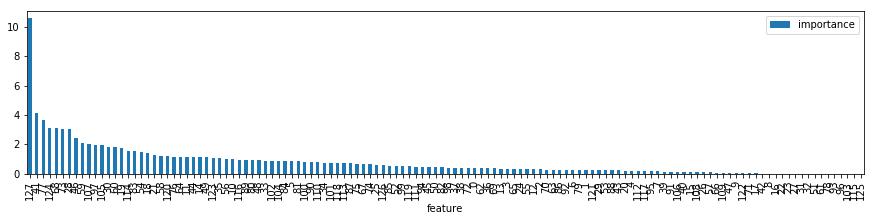

,importance
feature,
127,10.571889
41,4.110223
77,3.646702
124,3.139873
68,3.105472
73,3.050422
28,3.038076
46,2.403407
59,2.116412


In [0]:
df_importances = displayImp(clf, df_train)

In [0]:
list(df_importances.tail(15).index)

[19, 40, 13, 124, 77, 46, 45, 3, 15, 60, 61, 76, 91, 99, 113]